# 📊 Customer Churn Prediction (Machine Learning Project)

---

## 🎯 Problem Statement

Customer churn refers to the situation when customers stop doing business with a company. Predicting churn can help companies proactively identify dissatisfied customers and take steps to retain them.

**Objective:**  
To build a machine learning model that accurately predicts whether a customer will churn or not, based on their demographics, usage patterns, and service details.

---


## 📂 Dataset Collection

We will use the **Telco Customer Churn** dataset from Kaggle.

- **Source:** [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **File Format:** CSV
- **Target Variable:** `Churn` (Yes/No)

### 🧾 Dataset Features Include:

- `customerID` – Unique customer identifier
- `gender` – Male/Female
- `SeniorCitizen` – Whether the customer is a senior citizen (1, 0)
- `Partner`, `Dependents`
- `tenure` – Number of months the customer has stayed
- `PhoneService`, `InternetService`, `StreamingTV`, etc.
- `MonthlyCharges`, `TotalCharges`
- `Churn` – Whether the customer left (Yes/No)

---

### 📥 Load the Dataset

In [1]:
# Set the path of the dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

In [2]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(path)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

### ✅ Basic Dataset Overview

In [3]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Get a summary of data types and missing values
df.info()

# Check for null values
df.isnull().sum()

Dataset contains 7043 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---

### 📝 Dataset Overview Summary

In the code above, we performed an initial inspection of the dataset using the following steps:

1. **Dataset Shape:**
   
The dataset contains 7,043 rows and 21 columns, representing customer records and their associated features.

✅ This is a decent-sized dataset for classification tasks like churn prediction.

2. **Data Types and Structure:**

Most columns are of type object (categorical), while a few are int64 or float64 (numerical).

✅ There are no immediate issues like mismatched types or unexpected nulls.

3. **Missing Values Check:**

All columns have 0 missing values.

✅ This means we don't need to perform any imputation or row dropping due to missing data.

🔍 Conclusion:
The dataset is clean, with no missing values, appropriate data types, and a manageable number of records. We can safely move on to exploratory data analysis (EDA).

---

### 📊 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand feature distributions, detect patterns, and identify any imbalance in the target variable (`Churn`). Visualizations will help us draw insights before model building.

---

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---

#### 🎯 1. Distribution of Target Variable (`Churn`)

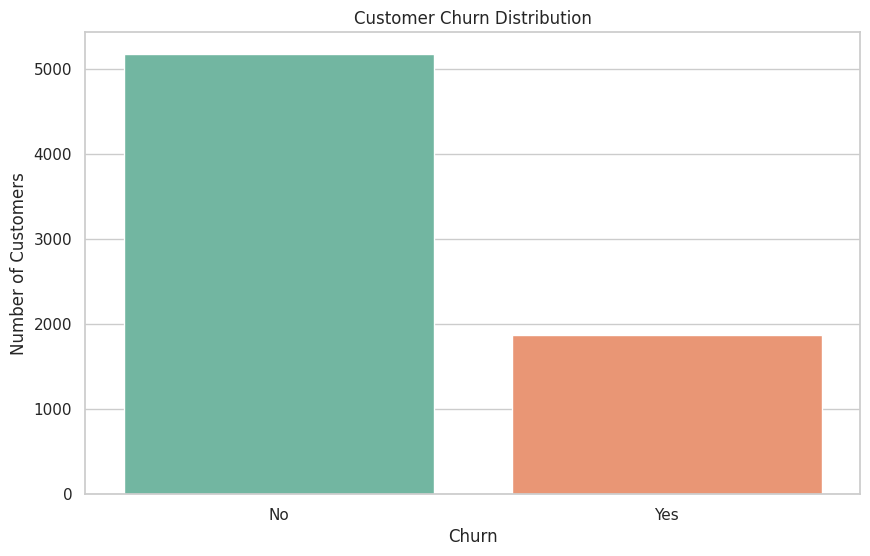

Churn Rate (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [5]:
# Countplot of churn distribution
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# Show churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

---

#### 📌 2. Categorical Features vs Churn

Let’s explore how key categorical features relate to churn.

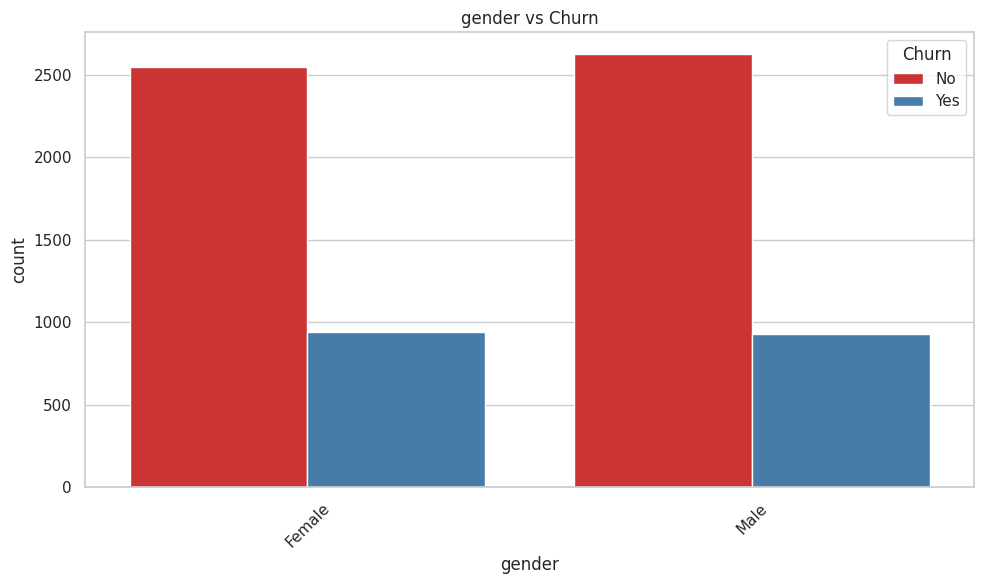

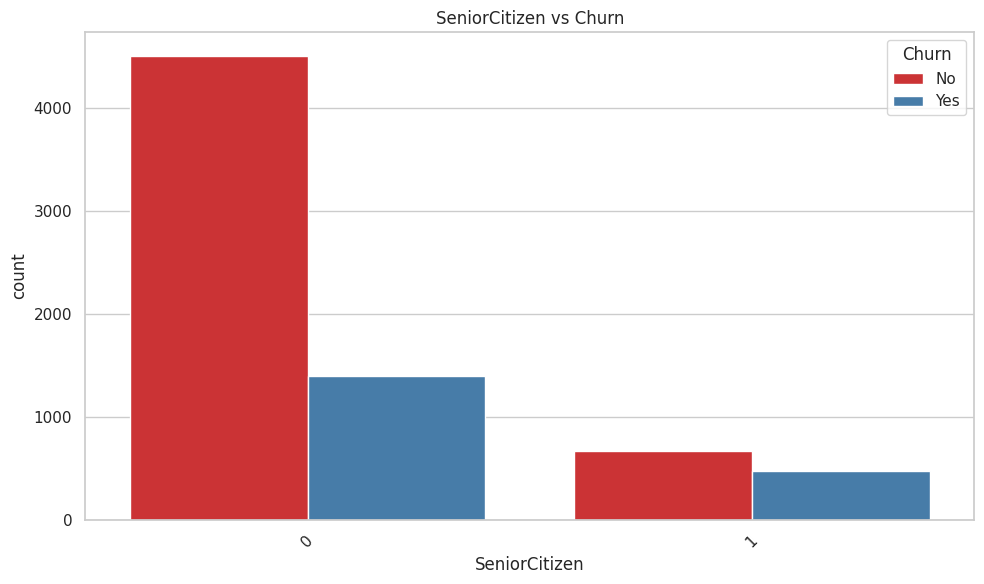

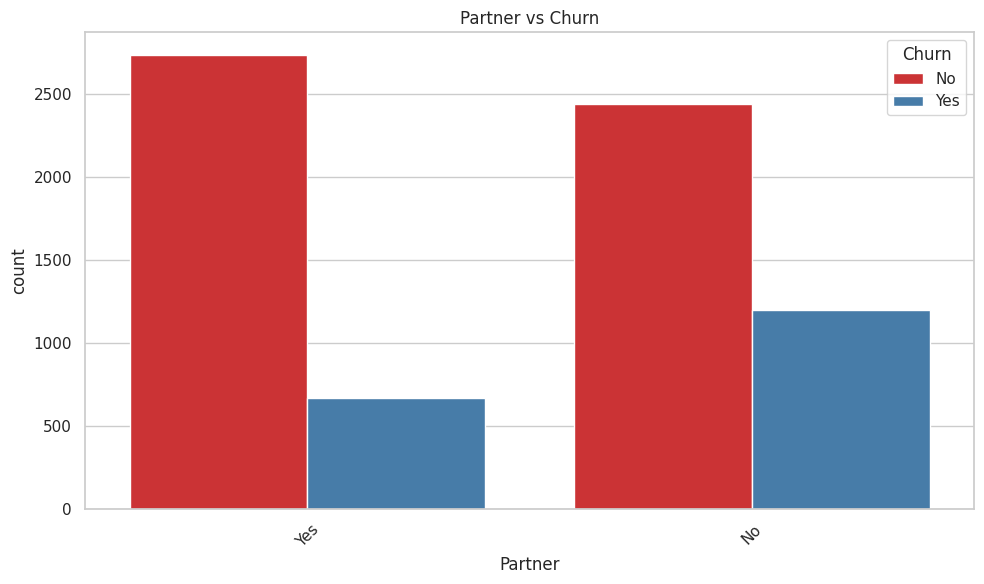

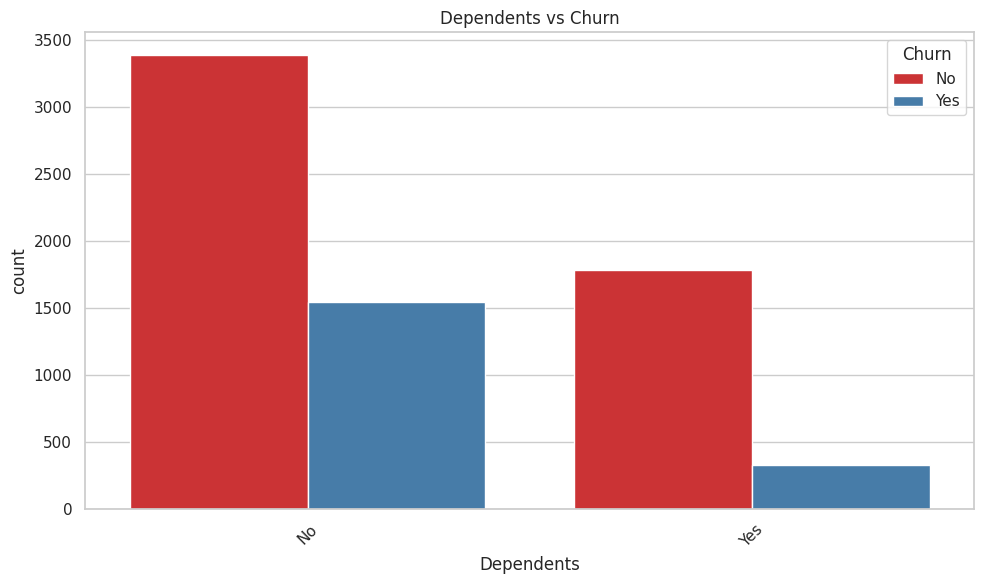

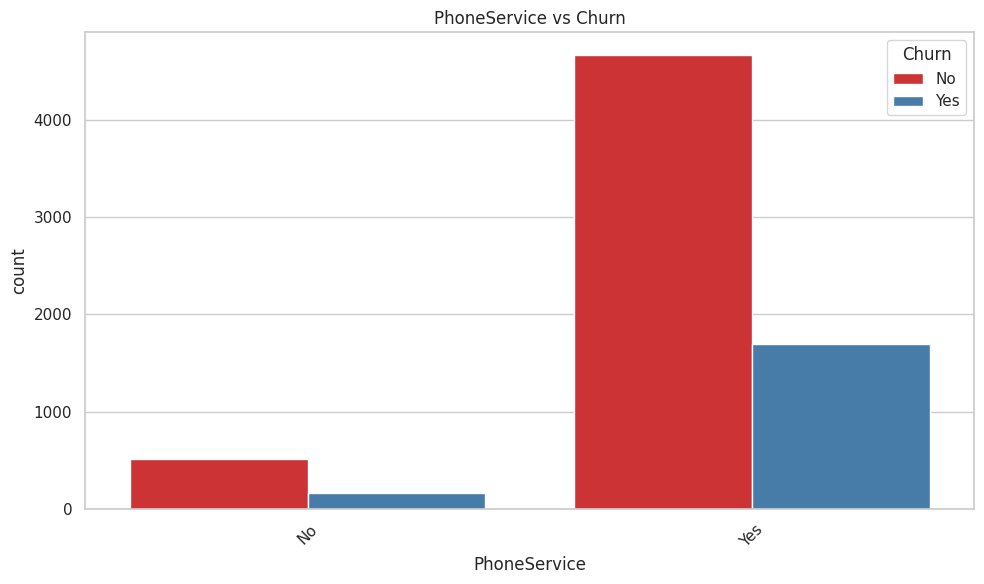

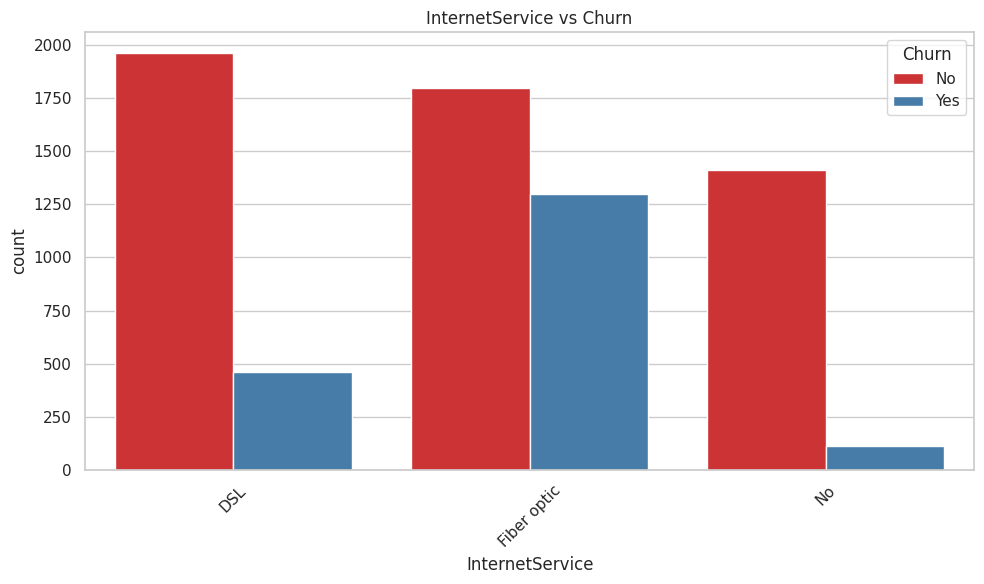

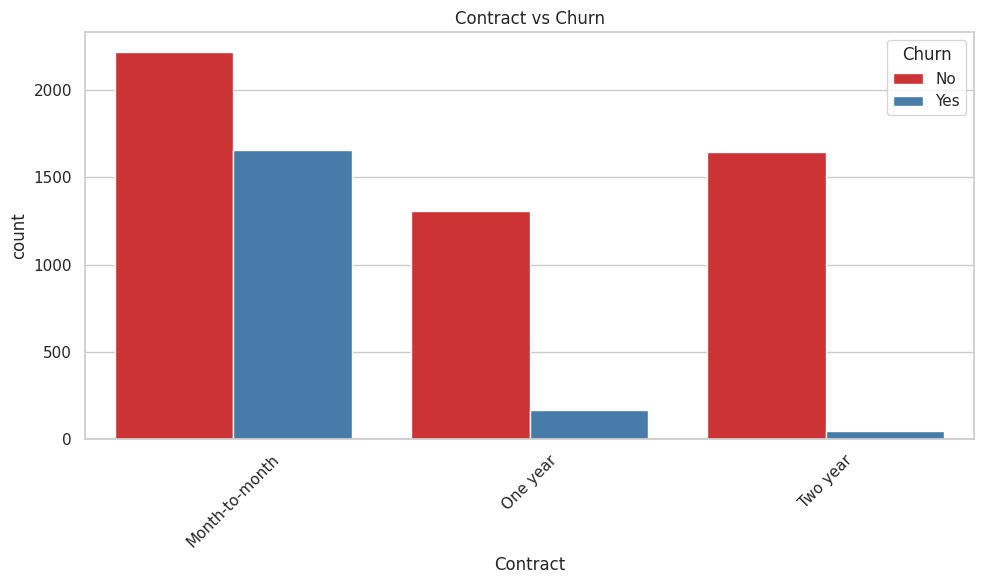

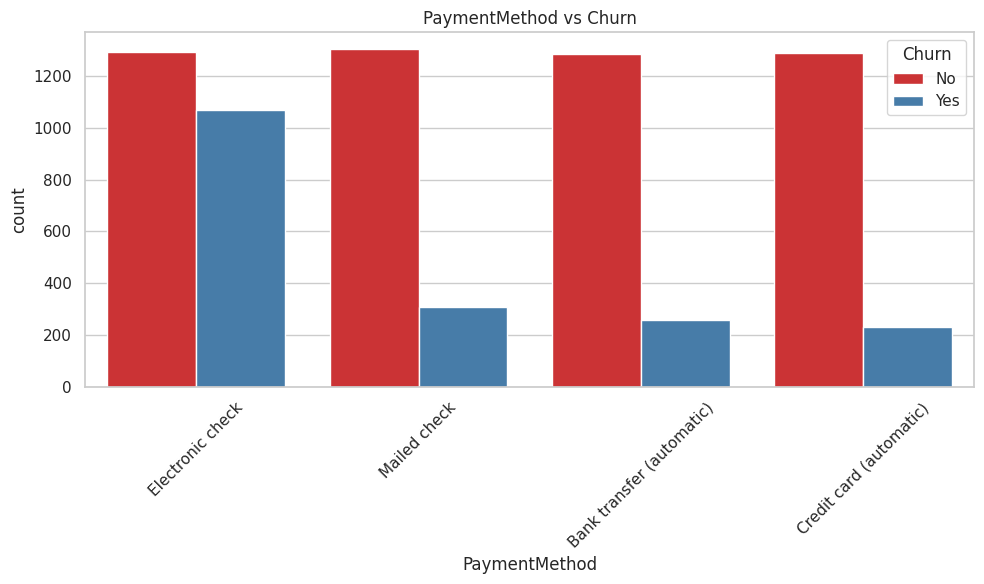

In [6]:
# List of key categorical features to plot
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

# Plot each as a countplot grouped by churn
for feature in categorical_features:
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f"{feature} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

---

#### 📉 3. Numerical Features Analysis

Visualize the distribution of numerical features and how they relate to churn.

---

#### ⚠️ Data Fix: Convert `TotalCharges` to Numeric

The `TotalCharges` column was stored as text (`object`) due to non-numeric values (e.g., blanks).

In [7]:
# Convert TotalCharges to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optional: drop rows with NaN values in TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Reset index (optional)
df.reset_index(drop=True, inplace=True)

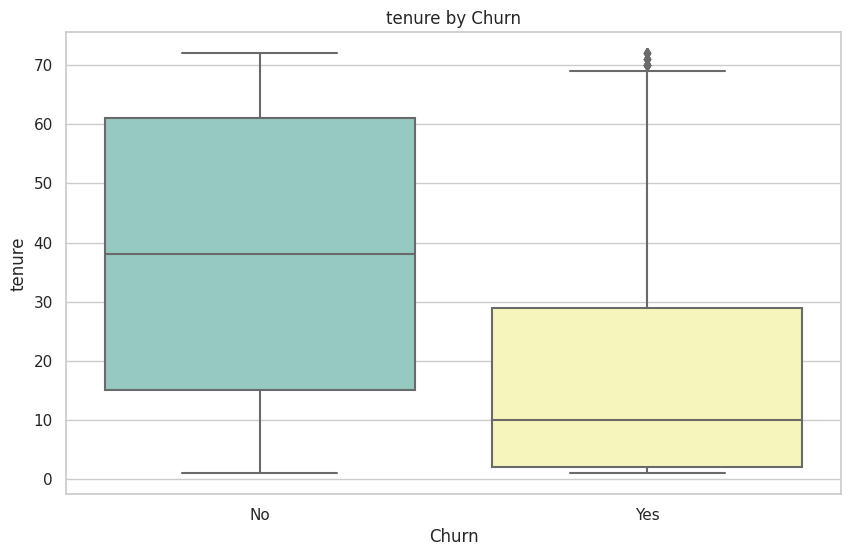

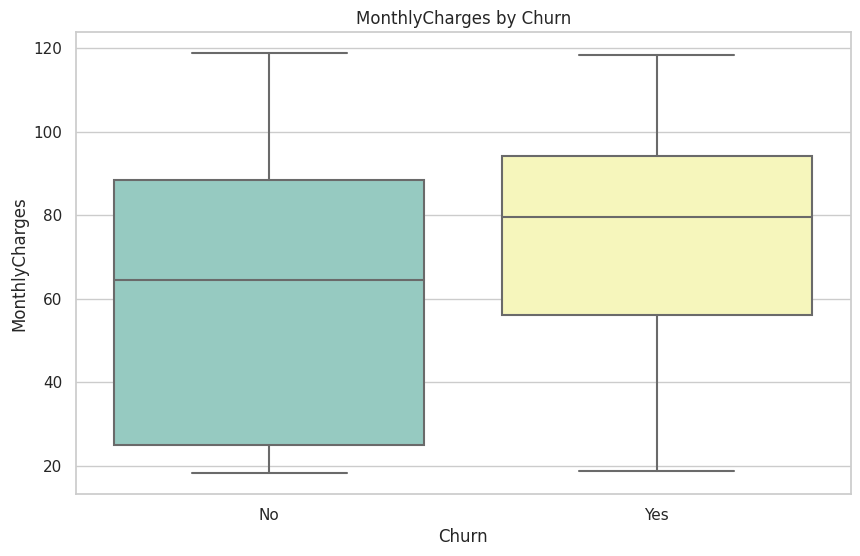

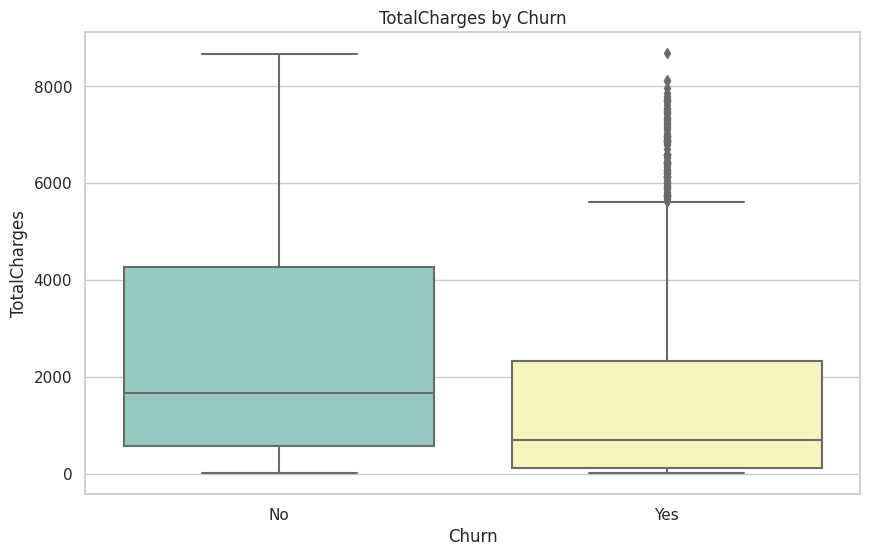

In [8]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    sns.boxplot(x='Churn', y=feature, data=df, palette='Set3')
    plt.title(f"{feature} by Churn")
    plt.show()

---

### 🔍 Key Insights from EDA

Based on the exploratory analysis:

- 📌 **Churn Imbalance**: Most customers did not churn — indicating some class imbalance we'll need to handle later.
- 📊 **Categorical Features**:
  - Customers with **Month-to-Month contracts** churn more frequently than those on **1- or 2-year contracts**.
  - **Electronic check** users show higher churn than those using other payment methods.
  - **Fiber optic** internet service is more common among churned users.
- 📈 **Numerical Features**:
  - Customers who churn tend to have **shorter tenure** (newer customers leave more often).
  - **Monthly charges** are generally higher for churned users.
  - **Total charges** are lower for churned customers — again indicating early drop-off.

> These patterns suggest that both **contract type**, **tenure**, and **billing behavior** play major roles in churn prediction.

---

Up next: **Data Preprocessing** — including encoding categorical variables and scaling numerical features for model input.

---

---

### 🛠️ Data Preprocessing: Encoding Categorical Variables

Most machine learning models require numeric input. So we need to convert all categorical columns (like `gender`, `Contract`, `InternetService`, etc.) into numerical format.

We'll use **Label Encoding** for binary columns and **One-Hot Encoding** for multiclass columns using `pd.get_dummies()`.

---

In [9]:
# Check which columns are of type 'object'
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:\n", cat_cols)

Categorical columns:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [10]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Convert target variable 'Churn' to binary: Yes=1, No=0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# View the transformed dataset
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


---

### 📏 Feature Scaling

To ensure all features contribute equally to the model, we'll scale the numerical features using **StandardScaler** from `sklearn.preprocessing`. This technique standardizes data to have **mean = 0** and **standard deviation = 1**.

We'll scale only after splitting data (to avoid data leakage), but first we separate the features and target.

---

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

### 🤖 Model Training: Logistic Regression

We’ll start with **Logistic Regression** to predict churn. It’s a popular linear classification algorithm that estimates the probability of a customer churning.

We'll fit the model using the training set, then evaluate it using accuracy, precision, recall, and the confusion matrix.

---

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7867803837953091
Precision: 0.6185897435897436
Recall: 0.516042780748663

Confusion Matrix:
 [[914 119]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



---

### 🧠 Model Comparison

To improve accuracy, we’ll compare different machine learning models:
- Random Forest
- K-Nearest Neighbors
- Support Vector Machine (SVM)

We will train and evaluate each model on the same dataset and compare performance metrics.

---

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print()

--- Random Forest ---
Accuracy: 0.7846
Precision: 0.6254
Recall: 0.4733

--- K-Nearest Neighbors ---
Accuracy: 0.7520
Precision: 0.5352
Recall: 0.5080

--- Support Vector Machine ---
Accuracy: 0.7811
Precision: 0.6162
Recall: 0.4679



---

### 🧩 Confusion Matrix Visualization

The confusion matrix gives us detailed insights into model performance:
- **True Positives (TP):** Correctly predicted churn
- **True Negatives (TN):** Correctly predicted no churn
- **False Positives (FP):** Incorrectly predicted churn
- **False Negatives (FN):** Missed churn

Let’s plot confusion matrices for each model.

---

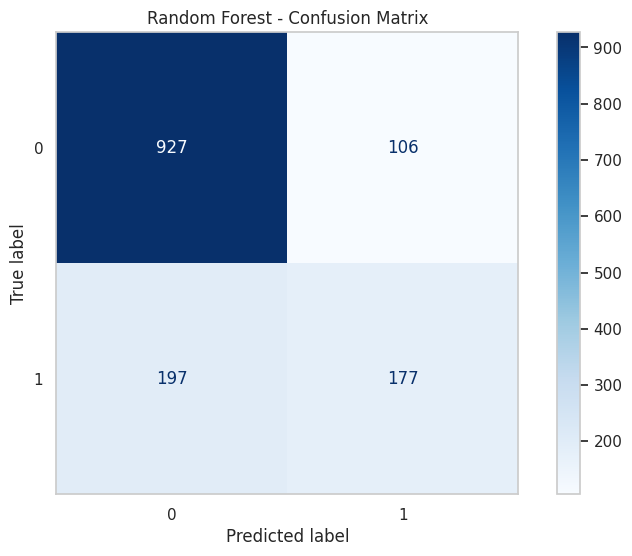

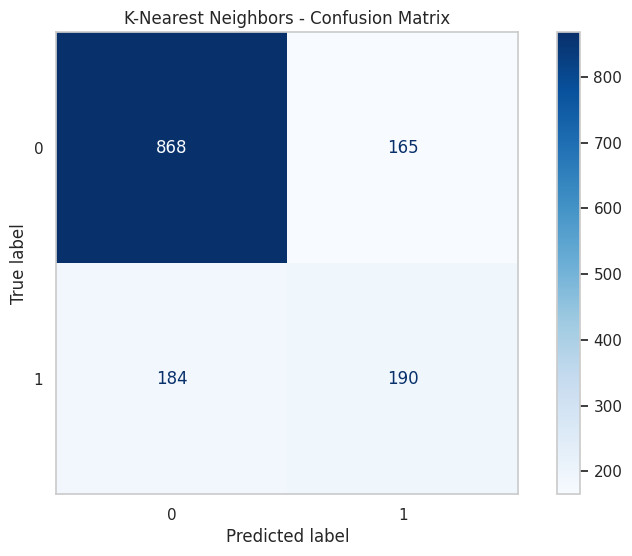

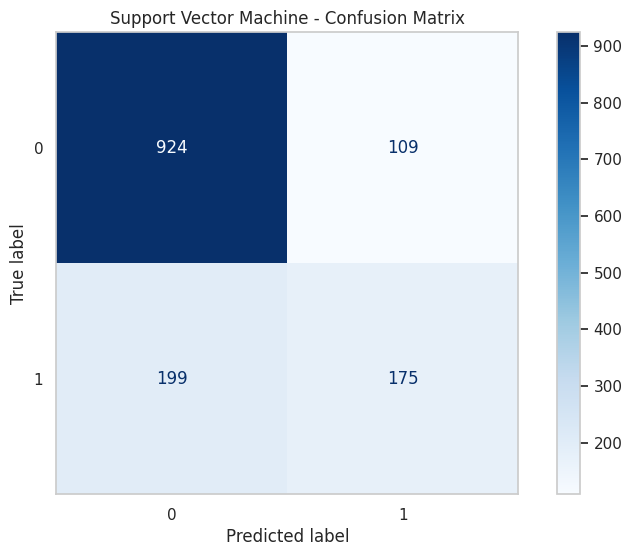

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

---

### 🌟 Feature Importance

Feature importance tells us which variables are most influential in predicting churn.  
We’ll use the Random Forest model to visualize the top features.

---

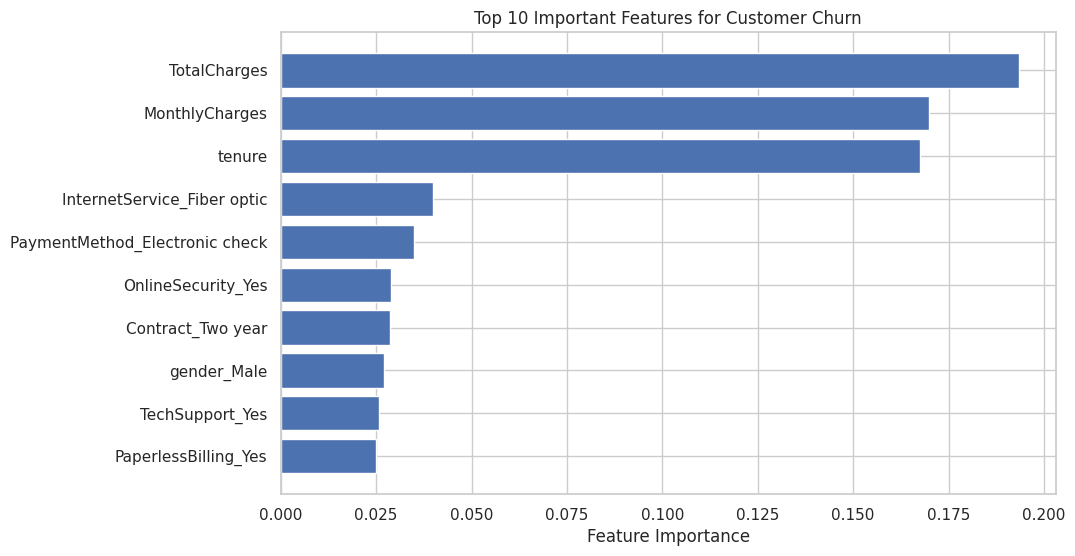

In [15]:
import numpy as np

# Get feature importances from the trained Random Forest model
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

# Match importance values with feature names
feature_names = X.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Customer Churn")
plt.grid(True)
plt.show()

---

## 📄 Project Summary: Customer Churn Prediction

### 🔍 Objective
The goal of this project was to develop a machine learning model that predicts whether a customer will churn, using the Telco Customer Churn dataset.

---

### 📊 Steps Performed

1. **Data Understanding & Cleaning**
   - Loaded dataset, checked for missing values and data types.
   - Cleaned and converted necessary columns (e.g., `TotalCharges` to numeric).

2. **Exploratory Data Analysis (EDA)**
   - Visualized relationships between churn and features like `Contract`, `MonthlyCharges`, and `tenure`.
   - Observed that longer contracts and lower charges reduced churn likelihood.

3. **Data Preprocessing**
   - Applied label encoding and one-hot encoding to categorical features.
   - Scaled numerical features using `StandardScaler`.

4. **Model Building**
   - Trained and evaluated Logistic Regression, Random Forest, SVM, and KNN models.
   - Used accuracy, precision, recall, and confusion matrix for evaluation.

5. **Model Evaluation**
   - Random Forest performed the best in terms of accuracy and feature interpretation.
   - Plotted confusion matrices for all models.

6. **Feature Importance**
   - Visualized top features impacting churn (e.g., `Contract`, `MonthlyCharges`, `tenure`).

---

### 🧠 Key Takeaways
- Customers with month-to-month contracts and high monthly charges are more likely to churn.
- Models like Random Forest and Logistic Regression are effective in predicting churn.
- Understanding feature importance helps in making data-driven business decisions.